In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/Othercomputers/My MacBook Pro/MIMIC-Multitask-Learner

/content/drive/Othercomputers/My MacBook Pro/MIMIC-Multitask-Learner


In [ ]:
ls data/

CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv
CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes_plus_death.csv
test_padded.csv
train_padded.csv
validation_padded.csv


In [ ]:
ls src/

__init__.py  multitask.py    preprocess.py  utils.py
lstm.py      padded_data.py  train.py


In [ ]:
ls models/

death_lstm/  multitask_mi_sepsis/        sepsis_lstm/
mi_lstm/     multitask_mi_sepsis_death/


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!python src/padded_data.py

Reading in MIMIC data at the HADMI_ID/HADMID_DAY-level
src/padded_data.py:81: DtypeWarning: Columns (150,152) have mixed types.Specify dtype option on import or set low_memory=False.
  df = get_mimic_data()
tcmalloc: large alloc 1146191872 bytes == 0x814b8000 @  0x7f42e2c531e7 0x7f42e05a40ce 0x7f42e05facf5 0x7f42e05faf4f 0x7f42e069d673 0x5936cc 0x548c51 0x5127f1 0x593dd7 0x5118f8 0x549576 0x593fce 0x548ae9 0x5127f1 0x593dd7 0x5118f8 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x4bca8a 0x532b86
Fetched data of shape: (628391, 237)
Filtering out patients that were in the ICU for less than 2 days
Outliers (>99.0%) in 'AGE' above 300.0 imputed with median: 0.00
Adding targets: 'MI', 'Sepsis'
Padding data for train split
Padding sequences of length 14 with value 0
Shape of data after padding: (481488, 244)
Data written to file: data/train_padded.csv
Padding data for test split
Padding sequences of length 14 with value 

In [ ]:
!ls ./data

CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv
CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes_plus_death.csv
test_padded.csv
train_padded.csv
validation_padded.csv


In [ ]:
import src

In [ ]:
import src.utils
import importlib

In [ ]:
# After updating Python files, rerun this code block
importlib.reload(src.utils)
from src.utils import MimicDataMI, MimicDataSepsis, MimicDataDeath, get_mimic_data, filter_mimic_day1

In [ ]:
df = get_mimic_data()

Reading in MIMIC data at the HADMI_ID/HADMID_DAY-level


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (150,152) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Fetched data of shape: (628391, 237)


## Baseline Model Data

In [ ]:
baseline_df = filter_mimic_day1(df)
baseline_df.head()

Filtering only on day 1 in the ICU
Baseline data shape: (58034, 237)


,BUN,HDL,INR,Inspired O2 Fraction,LDL,PEEP Set,PTT,RBCs,WBCs,anion gap,...,vancomycin,vasopressin,warfarin,zolpidem,HADM_ID,CKD,Infection,ct_angio,DEATHTIME,DEATH
0,41.0,41.0,15.3,50.0,81.0,5.0,32.4,3.39,11.2,18.0,...,0.0,0.0,0.0,0.0,100001,0,1,0,NaN,0
5,49.0,41.0,15.3,50.0,81.0,5.0,32.4,3.39,13.4,10.0,...,1.0,0.0,0.0,0.0,100003,0,1,0,NaN,0
8,23.0,41.0,15.3,50.0,81.0,5.0,32.4,3.39,10.9,13.0,...,0.0,0.0,1.0,0.0,100006,0,1,1,NaN,0
14,12.0,41.0,15.3,50.0,81.0,5.0,32.4,4.01,12.3,13.0,...,0.0,0.0,0.0,0.0,100007,0,1,0,NaN,0
22,23.0,41.0,15.3,50.0,81.0,5.0,32.4,3.39,10.9,13.0,...,0.0,0.0,0.0,0.0,100010,0,0,1,NaN,0


In [ ]:
sepsis_data = MimicDataSepsis(baseline_df)
mi_data = MimicDataMI(baseline_df)

Outliers (>99.0%) in 'AGE' above 300.0 imputed with median: 51.00
Total sepsis events:
0    45973
1    12061
Name: Sepsis, dtype: int64
Outliers (>99.0%) in 'AGE' above 300.0 imputed with median: 51.00
Total MI events:
0    56968
1     1066
Name: MI, dtype: int64


In [ ]:
death_data = MimicDataDeath(baseline_df)

Outliers (>99.0%) in 'AGE' above 300.0 imputed with median: 51.00
Total death events:
0    57649
1      385
Name: DEATH, dtype: int64


In [ ]:
N = baseline_df.shape[0]
print(N)

58034


In [ ]:
## Sepsis
12061/N

0.20782644656580626

In [ ]:
## MI
1066/N

0.018368542578488474

In [ ]:
##Death
385/N

0.006634042113243961

In [ ]:
## sepsis
12061/N
## mi
1066/N
## death
385/N

0.006634042113243961

## Logistic Regression baselines

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

sepsis_data.split_train_test()

sepsis_lr = LogisticRegression(solver='liblinear', random_state=0)
sepsis_lr.fit(sepsis_data.get_train_feats(), sepsis_data.get_train_target())

pred_y_test_sepsis = sepsis_lr.predict(sepsis_data.get_test_feats())
test_acc_sepsis = accuracy_score(sepsis_data.get_test_target(),pred_y_test_sepsis)
test_roc_sepsis = roc_auc_score(sepsis_data.get_test_target(),pred_y_test_sepsis)
test_precision_recall_sepsis = average_precision_score(sepsis_data.get_test_target(),pred_y_test_sepsis)

print(f'Accuracy: {test_acc_sepsis}')
print(f'AUROC: {test_roc_sepsis}')
print(f'AUPRC: {test_precision_recall_sepsis}')

Splitting data with 30.00% test split
Train data has shape: (40623, 243)
Test data shape: (17411, 243)
Stratified by target variable: Sepsis
8443/40623 events in train; 3618/17411 events in test
Dropping columns: ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME', 'DEATHTIME', 'hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points', 'Sepsis']
Shape of X features: (40623, 231)
Accuracy: 0.8956981218769743
AUROC: 0.809793400703131
AUPRC: 0.6009281957326515


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
mi_data.split_train_test()

mi_lr = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)
mi_lr.fit(mi_data.get_train_feats(), mi_data.get_train_target())

pred_y_test_mi = mi_lr.predict(mi_data.get_test_feats())
test_acc_mi = accuracy_score(mi_data.get_test_target(),pred_y_test_mi)
test_roc_mi = roc_auc_score(mi_data.get_test_target(),pred_y_test_mi)
test_precision_recall_mi = average_precision_score(mi_data.get_test_target(),pred_y_test_mi)

print(f'Accuracy: {test_acc_mi}')
print(f'AUROC: {test_roc_mi}')
print(f'AUPRC: {test_precision_recall_mi}')

Splitting data with 30.00% test split
Train data has shape: (40623, 238)
Test data shape: (17411, 238)
Stratified by target variable: MI
746/40623 events in train; 320/17411 events in test
Dropping columns: ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME', 'DEATHTIME', 'troponin', 'troponin_std', 'troponin_min', 'troponin_max', 'MI']
Shape of X features: (40623, 227)
Accuracy: 0.9815633794727471
AUROC: 0.5306356415657364
AUPRC: 0.0477182913521169


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

death_data.split_train_test()

death_lr = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)
death_lr.fit(death_data.get_train_feats(), death_data.get_train_target())

pred_y_test_death = death_lr.predict(death_data.get_test_feats())
test_acc_death = accuracy_score(death_data.get_test_target(),pred_y_test_death)
test_roc_death = roc_auc_score(death_data.get_test_target(),pred_y_test_death)
test_precision_recall_death = average_precision_score(death_data.get_test_target(),pred_y_test_death)

print(f'Accuracy: {test_acc_death}')
print(f'AUROC: {test_roc_death}')
print(f'AUPRC: {test_precision_recall_death}')

Splitting data with 30.00% test split
Train data has shape: (40623, 237)
Test data shape: (17411, 237)
Stratified by target variable: DEATH
269/40623 events in train; 116/17411 events in test
Dropping columns: ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME', 'DEATHTIME', 'DEATHTIME', 'DEATH']
Shape of X features: (40623, 230)
Accuracy: 0.993337545230027
AUROC: 0.5599400863315089
AUPRC: 0.06620319298739005


## Multilayer Perceptron (MLP) baselines

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import metrics

N_EPOCHS = 10
BATCH_SIZE = 30

sepsis_data.split_train_test()

sepsis_mlp = Sequential()
num_features = sepsis_data.get_feats().shape[1]

sepsis_mlp = Sequential()
sepsis_mlp.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer'))
sepsis_mlp.add(Dense(units=1, activation='sigmoid', name='output_layer')) 

opt = SGD(learning_rate=0.1)

METRICS = [
        metrics.BinaryAccuracy(name='accuracy'),
        metrics.AUC(name='auc'),
        metrics.AUC(name='prc', curve='PR')  # precision-recall curve
    ]

sepsis_mlp.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
sepsis_mlp.summary()

history = sepsis_mlp.fit(x=sepsis_data.get_train_feats(), 
         y=sepsis_data.get_train_target(),
         validation_data = (sepsis_data.get_test_feats(), sepsis_data.get_test_target()),
         batch_size=BATCH_SIZE,
         epochs=N_EPOCHS)

Splitting data with 30.00% test split
Train data has shape: (40623, 243)
Test data shape: (17411, 243)
Stratified by target variable: Sepsis
8443/40623 events in train; 3618/17411 events in test
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                7424      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 7,457
Trainable params: 7,457
Non-trainable params: 0
_________________________________________________________________
Dropping columns: ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME', 'DEATHTIME', 'hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points', 'Sepsis']
Shape of X features: (40623, 231)
Epoch 1/10
1355/1355 [=

In [ ]:
## evaluate on test set
sepsis_mlp.evaluate(sepsis_data.get_test_feats(), sepsis_data.get_test_target())

545/545 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.7922 - auc: 0.6316 - prc: 0.2625


[0.45566970109939575,
 0.7922003269195557,
 0.6315884590148926,
 0.26253536343574524]

In [ ]:
N_EPOCHS = 10
BATCH_SIZE = 30

mi_data.split_train_test()

mi_mlp = Sequential()
num_features = mi_data.get_feats().shape[1]

mi_mlp = Sequential()
mi_mlp.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer'))
mi_mlp.add(Dense(units=1, activation='sigmoid', name='output_layer')) 

opt = SGD(learning_rate=0.1)

METRICS = [
        metrics.BinaryAccuracy(name='accuracy'),
        metrics.AUC(name='auc'),
        metrics.AUC(name='prc', curve='PR')  # precision-recall curve
    ]

mi_mlp.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
mi_mlp.summary()

history = mi_mlp.fit(x=mi_data.get_train_feats(), 
         y=mi_data.get_train_target(),
         validation_data = (mi_data.get_test_feats(), mi_data.get_test_target()),
         batch_size=BATCH_SIZE,
         epochs=N_EPOCHS)

Splitting data with 30.00% test split
Train data has shape: (40623, 238)
Test data shape: (17411, 238)
Stratified by target variable: MI
746/40623 events in train; 320/17411 events in test
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                7296      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
_________________________________________________________________
Dropping columns: ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME', 'DEATHTIME', 'troponin', 'troponin_std', 'troponin_min', 'troponin_max', 'MI']
Shape of X features: (40623, 227)
Epoch 1/10
1355/1355 [==============================] - 8s 4ms/step 

In [ ]:
## evaluate on test set 
mi_mlp.evaluate(mi_data.get_test_feats(), mi_data.get_test_target())

545/545 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9816 - auc: 0.6081 - prc: 0.0233


[0.08723724633455276,
 0.9816207885742188,
 0.608068585395813,
 0.023328715935349464]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import metrics
N_EPOCHS = 10
BATCH_SIZE = 30

death_data.split_train_test()

death_mlp = Sequential()
num_features = death_data.get_feats().shape[1]

death_mlp = Sequential()
death_mlp.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer'))
death_mlp.add(Dense(units=1, activation='sigmoid', name='output_layer')) 

opt = SGD(learning_rate=0.1)

METRICS = [
        metrics.BinaryAccuracy(name='accuracy'),
        metrics.AUC(name='auc'),
        metrics.AUC(name='prc', curve='PR')  # precision-recall curve
    ]

death_mlp.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
death_mlp.summary()

history = death_mlp.fit(x=death_data.get_train_feats(), 
         y=death_data.get_train_target(),
         validation_data = (death_data.get_test_feats(), death_data.get_test_target()),
         batch_size=BATCH_SIZE,
         epochs=N_EPOCHS)

Splitting data with 30.00% test split
Train data has shape: (40623, 237)
Test data shape: (17411, 237)
Stratified by target variable: DEATH
269/40623 events in train; 116/17411 events in test
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                7392      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 7,425
Trainable params: 7,425
Non-trainable params: 0
_________________________________________________________________
Dropping columns: ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME', 'DEATHTIME', 'DEATHTIME', 'DEATH']
Shape of X features: (40623, 230)
Epoch 1/10
1355/1355 [==============================] - 5s 3ms/step - loss: 30953.8047 - accuracy: 0.9921 - a

In [ ]:
## evaluate on test set 
death_mlp.evaluate(death_data.get_test_feats(), death_data.get_test_target())

545/545 [==============================] - 1s 2ms/step - loss: 0.0401 - accuracy: 0.9933 - auc: 0.5274 - prc: 0.0145


[0.04007691890001297,
 0.9932801127433777,
 0.5273649096488953,
 0.01450335793197155]

## LSTM

In [ ]:
## lstm MI train
!python src/lstm.py

Shape of X matrix: (34392, 14, 232)
Shape of Y matrix: (34392, 14, 1)
2022-05-05 00:15:01.790803: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
~~~ PRINTING MODEL SUMMARY ~~~
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14, 232)]    0           []                               
                                                                                                  
 permute (Permute)              (None, 232, 14)      0           ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 232, 14)      0           ['permute[0][0]']                
                             

In [ ]:
## lstm MI test
!python src/lstm.py

Shape of X matrix: (16378, 14, 232)
Shape of Y matrix: (16378, 14, 1)
2022-05-05 00:35:15.294387: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-05 00:35:15.950620: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-05 00:35:17.406431: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-05 00:35:17.784822: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-05 00:35:17.806107: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but t

In [ ]:
# lstm sepsis train
!python src/lstm.py

Shape of X matrix: (34392, 14, 231)
Shape of Y matrix: (34392, 14, 1)
2022-05-04 22:43:48.631162: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
~~~ PRINTING MODEL SUMMARY ~~~
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14, 231)]    0           []                               
                                                                                                  
 permute (Permute)              (None, 231, 14)      0           ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 231, 14)      0           ['permute[0][0]']                
                             

In [ ]:
## lstm sepsis test
!python src/lstm.py

Shape of X matrix: (16378, 14, 231)
Shape of Y matrix: (16378, 14, 1)
2022-05-04 23:05:47.674390: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-04 23:05:48.353541: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-04 23:05:49.832317: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-04 23:05:50.217990: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-04 23:05:50.239034: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but t

In [ ]:
## lstm death train
!python src/lstm.py

Shape of X matrix: (34392, 14, 237)
Shape of Y matrix: (34392, 14, 1)
2022-05-04 17:31:39.363062: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
~~~ PRINTING MODEL SUMMARY ~~~
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14, 237)]    0           []                               
                                                                                                  
 permute (Permute)              (None, 237, 14)      0           ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 237, 14)      0           ['permute[0][0]']                
                             

In [ ]:
## lstm death test
!python src/lstm.py

Shape of X matrix: (16378, 14, 237)
Shape of Y matrix: (16378, 14, 1)
2022-05-04 18:11:24.236036: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-04 18:11:25.009871: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-04 18:11:26.634113: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-04 18:11:27.069313: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-05-04 18:11:27.093780: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but t

## Multitask

In [ ]:
import src.lstm
import src.multitask
import importlib
importlib.reload(src.multitask)

<module 'src.multitask' from '/content/drive/Othercomputers/My MacBook Pro/MIMIC-Multitask-Learner/src/multitask.py'>

In [ ]:
## multitask sepsis,MI,death train
!python src/multitask.py

Shape of X matrix: (34392, 14, 226)
Shape of Y matrix: (34392, 14, 3)
2022-05-04 23:47:27.306094: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14, 226)]    0           []                               
                                                                                                  
 permute (Permute)              (None, 226, 14)      0           ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 226, 14)      0           ['permute[0][0]']                
                                                            

In [ ]:
## multitask sepsis, MI and death test
!python src/multitask.py

Shape of X matrix: (34392, 14, 226)
Shape of Y matrix: (34392, 14, 3)
2022-05-04 23:57:52.597176: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14, 226)]    0           []                               
                                                                                                  
 permute (Permute)              (None, 226, 14)      0           ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 226, 14)      0           ['permute[0][0]']                
                                                            

## Visualization
### AU-ROC plots

In [ ]:
### prepare AUROC plot
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
#### Sepsis
#### logistic regression
y_pred_logistic = sepsis_lr.predict(sepsis_data.get_test_feats())
y_test_logistic = sepsis_data.get_test_target()
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_logistic, y_pred_logistic)
auc_logistic_sepsis = auc(fpr_logistic, tpr_logistic)

#### MLP
y_pred_mlp = sepsis_mlp.predict(sepsis_data.get_test_feats())
y_pred_mlp.shape
y_test_mlp = sepsis_data.get_test_target()
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test_mlp, y_pred_mlp)
auc_mlp_sepsis = auc(fpr_mlp, tpr_mlp)

In [ ]:
#### LSTM
import src.lstm
import importlib

import pandas as pd
from keras.models import Model, load_model
from src.lstm import get_mimic_lstm_matrices

# Fetch model
# Global params from LSTM training script
target = 'Sepsis'
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME'] +\
 ['hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_lstm_matrices(test_df, target, time_steps)

# Fetch model
sepsis_model_lstm = load_model('models/'+target.lower()+'_lstm')


Shape of X matrix: (16378, 14, 232)
Shape of Y matrix: (16378, 14, 1)


In [ ]:
sepsis_pred_lstm = sepsis_model_lstm.predict(x_test)
sepsis_pred_lstm.shape

(16378, 14, 1)

In [ ]:
sepsis_pred_lstm_mean = np.mean(sepsis_pred_lstm, axis = 1)
sepsis_test_lstm_mean = np.where(np.mean(y_test, axis = 1)>0.7,1,0)
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(sepsis_test_lstm_mean, sepsis_pred_lstm_mean)
auc_lstm_sepsis = auc(fpr_lstm, tpr_lstm)
print(auc_lstm_sepsis)

0.9575358134878672


In [ ]:
### multitask
from src.multitask import get_mimic_multitask_matrices
# Global params from LSTM training script
targets = ['MI','Sepsis','DEATH']
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME'] +\
          ['hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points'] + \
          ['troponin', 'troponin_std', 'troponin_min', 'troponin_max']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_multitask_matrices(test_df, targets, time_steps)
y_dict = {target.lower(): y_test[:, :, [i]] for i, target in enumerate(targets)}

# Fetch model
model_multitask = load_model('models/multitask_' + '_'.join([target.lower() for target in targets]))

Shape of X matrix: (16378, 14, 226)
Shape of Y matrix: (16378, 14, 3)


In [ ]:
sepsis_pred_multitask = model_multitask.predict(x_test)
sepsis_pred_multitask = np.array(sepsis_pred_multitask)
sepsis_pred_multitask.shape


(3, 16378, 14, 1)

In [ ]:
sepsis_pred_multitask = sepsis_pred_multitask[1,:,:,0] ## 1 for Sepsis !!!
sepsis_pred_multitask_mean = np.mean(sepsis_pred_multitask, axis = 1)
sepsis_test_multitask = y_test[:,:,1] ## 1 for Sepsis !!!
sepsis_test_multitask_mean = np.mean(sepsis_test_multitask, axis = 1)
sepsis_test_multitask_mean = np.where(sepsis_test_multitask_mean>0.7, 1, 0)
fpr_multitask, tpr_multitask, thresholds_lstm = roc_curve(sepsis_test_multitask_mean, sepsis_pred_multitask_mean)
auc_multitask_sepsis = auc(fpr_multitask, tpr_multitask)
print(auc_multitask_sepsis)

0.9659484622914247


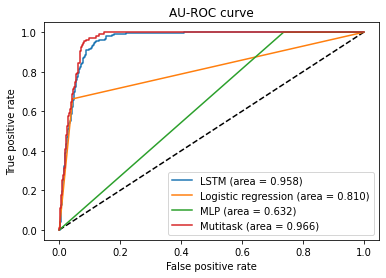

In [ ]:
### NOW plot the AU-ROC for SEPSIS!!
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm_sepsis))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic regression (area = {:.3f})'.format(auc_logistic_sepsis))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = {:.3f})'.format(auc_mlp_sepsis))
plt.plot(fpr_multitask, tpr_multitask, label='Mutitask (area = {:.3f})'.format(auc_multitask_sepsis))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AU-ROC curve')
plt.legend(loc='best')
plt.savefig('AU-ROC-Sepsis.svg', foramt = 'svg', dpi =1000)

In [ ]:
#### MI
#### logistic regression
y_pred_logistic = mi_lr.predict(mi_data.get_test_feats())
y_test_logistic = mi_data.get_test_target()
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_logistic, y_pred_logistic)
auc_logistic_MI = auc(fpr_logistic, tpr_logistic)

#### MLP
y_pred_mlp = mi_mlp.predict(mi_data.get_test_feats())
y_pred_mlp.shape
y_test_mlp = mi_data.get_test_target()
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test_mlp, y_pred_mlp)
auc_mlp_MI = auc(fpr_mlp, tpr_mlp)


In [ ]:
#### LSTM
import src.lstm
import importlib

import pandas as pd
from keras.models import Model, load_model
from src.lstm import get_mimic_lstm_matrices

# Fetch model
# Global params from LSTM training script
target = 'MI'
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATH'] +\
            ['troponin', 'troponin_std', 'troponin_min', 'troponin_max','DEATHTIME']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_lstm_matrices(test_df, target, time_steps)

# Fetch model
MI_model_lstm = load_model('models/'+target.lower()+'_lstm')

Shape of X matrix: (16378, 14, 232)
Shape of Y matrix: (16378, 14, 1)


In [ ]:
MI_pred_lstm = MI_model_lstm.predict(x_test)
MI_pred_lstm.shape
MI_pred_lstm_mean = np.mean(MI_pred_lstm, axis = 1)
MI_test_lstm_mean = np.where(np.mean(y_test, axis = 1)>0.1,1,0)
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(MI_test_lstm_mean, MI_pred_lstm_mean)
auc_lstm_MI = auc(fpr_lstm, tpr_lstm)
print(auc_lstm_MI)

0.7388889178513459


In [ ]:
### multitask
from src.multitask import get_mimic_multitask_matrices
# Global params from LSTM training script
targets = ['MI','Sepsis','DEATH']
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME'] +\
          ['hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points'] + \
          ['troponin', 'troponin_std', 'troponin_min', 'troponin_max']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_multitask_matrices(test_df, targets, time_steps)
y_dict = {target.lower(): y_test[:, :, [i]] for i, target in enumerate(targets)}

# Fetch model
model_multitask = load_model('models/multitask_' + '_'.join([target.lower() for target in targets]))

Shape of X matrix: (16378, 14, 226)
Shape of Y matrix: (16378, 14, 3)


In [ ]:
y_test.shape

(16378, 14, 3)

In [ ]:
MI_pred_multitask = model_multitask.predict(x_test)
MI_pred_multitask = np.array(MI_pred_multitask)
MI_pred_multitask.shape
MI_pred_multitask = MI_pred_multitask[0,:,:,0] ## 0 for MI !!!
MI_pred_multitask_mean = np.mean(MI_pred_multitask, axis = 1)
MI_test_multitask = y_test[:,:,0] ## 0 for MI !!!
MI_test_multitask_mean = np.mean(MI_test_multitask, axis = 1)
MI_test_multitask_mean = np.where(MI_test_multitask_mean>0.1, 1, 0)
fpr_multitask, tpr_multitask, thresholds_lstm = roc_curve(MI_test_multitask_mean, MI_pred_multitask_mean)
auc_multitask_MI = auc(fpr_multitask, tpr_multitask)
print(auc_multitask_MI)

0.8365517314525871


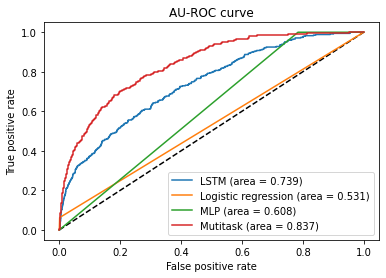

In [ ]:
### NOW plot the AU-ROC for MI!!
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm_MI))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic regression (area = {:.3f})'.format(auc_logistic_MI))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = {:.3f})'.format(auc_mlp_MI))
plt.plot(fpr_multitask, tpr_multitask, label='Mutitask (area = {:.3f})'.format(auc_multitask_MI))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AU-ROC curve')
plt.legend(loc='best')
plt.savefig('AU-ROC-MI.svg', foramt = 'svg', dpi =1000)

In [ ]:
#### Death
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
#### logistic regression
death_data.split_train_test()
y_pred_logistic = death_lr.predict(death_data.get_test_feats())
y_test_logistic = death_data.get_test_target()
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_logistic, y_pred_logistic)
auc_logistic_death = auc(fpr_logistic, tpr_logistic)

#### MLP
y_pred_mlp = death_mlp.predict(death_data.get_test_feats())
y_pred_mlp.shape
y_test_mlp = death_data.get_test_target()
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test_mlp, y_pred_mlp)
auc_mlp_death = auc(fpr_mlp, tpr_mlp)

Splitting data with 30.00% test split
Train data has shape: (40623, 237)
Test data shape: (17411, 237)
Stratified by target variable: DEATH
269/40623 events in train; 116/17411 events in test


In [ ]:
#### LSTM
import src.lstm
import importlib

import pandas as pd
from keras.models import Model, load_model
from src.lstm import get_mimic_lstm_matrices

# Fetch model
# Global params from LSTM training script
target = 'DEATH'
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
#test_df = test_df.iloc[:, :-1]
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_lstm_matrices(test_df, target, time_steps)

# Fetch model
death_model_lstm = load_model('models/'+target.lower()+'_lstm')

Shape of X matrix: (16378, 14, 237)
Shape of Y matrix: (16378, 14, 1)


In [ ]:
death_pred_lstm = death_model_lstm.predict(x_test)
death_pred_lstm.shape
death_pred_lstm_mean = np.mean(death_pred_lstm, axis = 1)
death_test_lstm_mean = np.where(np.mean(y_test, axis = 1)>0.07,1,0)
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(death_test_lstm_mean, death_pred_lstm_mean)
auc_lstm_death = auc(fpr_lstm, tpr_lstm)
print(auc_lstm_death)

0.937934561060937


In [ ]:
### multitask
from src.multitask import get_mimic_multitask_matrices
# Global params from LSTM training script
targets = ['MI','Sepsis','DEATH']
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME'] +\
          ['hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points'] + \
          ['troponin', 'troponin_std', 'troponin_min', 'troponin_max']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_multitask_matrices(test_df, targets, time_steps)
y_dict = {target.lower(): y_test[:, :, [i]] for i, target in enumerate(targets)}

# Fetch model
model_multitask = load_model('models/multitask_' + '_'.join([target.lower() for target in targets]))

Shape of X matrix: (16378, 14, 226)
Shape of Y matrix: (16378, 14, 3)


In [ ]:
death_pred_multitask = model_multitask.predict(x_test)
death_pred_multitask = np.array(death_pred_multitask)
death_pred_multitask.shape
death_pred_multitask = death_pred_multitask[2,:,:,0] ## 2 for Death !!!
death_pred_multitask_mean = np.mean(death_pred_multitask, axis = 1)
death_test_multitask = y_test[:,:,2] ## 2 for Death !!
death_test_multitask_mean = np.mean(death_test_multitask, axis = 1)
death_test_multitask_mean = np.where(death_test_multitask_mean>0.07, 1, 0)
fpr_multitask, tpr_multitask, thresholds_lstm = roc_curve(death_test_multitask_mean, death_pred_multitask_mean)
auc_multitask_death = auc(fpr_multitask, tpr_multitask)
print(auc_multitask_death)

0.9083946811759331


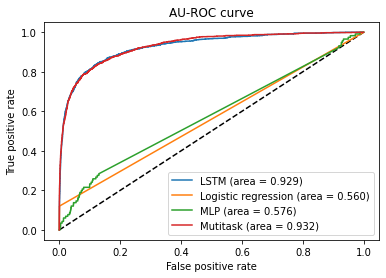

In [ ]:
### NOW plot the AU-ROC for Death!!
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm_death))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic regression (area = {:.3f})'.format(auc_logistic_death))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = {:.3f})'.format(auc_mlp_death))
plt.plot(fpr_multitask, tpr_multitask, label='Mutitask (area = {:.3f})'.format(auc_multitask_death))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AU-ROC curve')
plt.legend(loc='best')
plt.savefig('AU-ROC-Death.svg', foramt = 'svg', dpi =1000)

## Visualizing Attention (Heatmap)

With help from [this StackOverflow response](https://stackoverflow.com/a/53883859).

### LSTM

In [ ]:
import pandas as pd
from keras.models import Model, load_model
from src.lstm import get_mimic_lstm_matrices

# Global params from LSTM training script
target = 'Sepsis'
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME','DEATH'] +\
 ['hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_lstm_matrices(test_df, target, time_steps)

# Fetch model
model = load_model('models/'+target.lower()+'_lstm')

# Restructure model and fetch attention
model = Model(inputs=model.input,
              outputs=[model.output, model.get_layer('attention_vec').output])
outputs = model.predict(x_test)
model_outputs = outputs[0]
attention_outputs = outputs[1]

Shape of X matrix: (16378, 14, 231)
Shape of Y matrix: (16378, 14, 1)


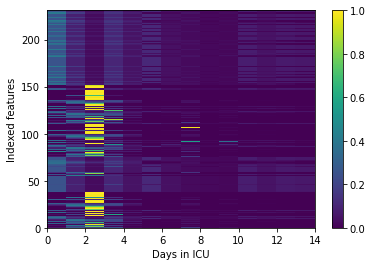

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot attention for single patient (index of 'attention_outputs')
plot_df = pd.DataFrame(attention_outputs[0]).transpose()

heatmap = plt.pcolor(plot_df)
plt.colorbar(heatmap)
plt.xlabel('Days in ICU')
plt.ylabel('Indexed features')
plt.savefig('Heatmap-LSTM-Sepsis.svg', foramt = 'svg', dpi =1000)

In [ ]:
# Global params from LSTM training script
target = 'MI'
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME','DEATH'] +\
['troponin', 'troponin_std', 'troponin_min', 'troponin_max']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_lstm_matrices(test_df, target, time_steps)

# Fetch model
model = load_model('models/'+target.lower()+'_lstm')

# Restructure model and fetch attention
model = Model(inputs=model.input,
              outputs=[model.output, model.get_layer('attention_vec').output])
outputs = model.predict(x_test)
model_outputs = outputs[0]
attention_outputs = outputs[1]

Shape of X matrix: (16378, 14, 232)
Shape of Y matrix: (16378, 14, 1)


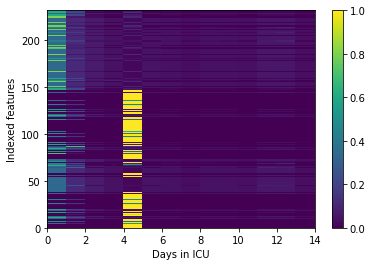

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot attention for single patient (index of 'attention_outputs')
plot_df = pd.DataFrame(attention_outputs[0]).transpose()

heatmap = plt.pcolor(plot_df)
plt.colorbar(heatmap)
plt.xlabel('Days in ICU')
plt.ylabel('Indexed features')
plt.savefig('Heatmap-LSTM-MI.svg', foramt = 'svg', dpi =1000)

In [ ]:
# Global params from LSTM training script
target = 'DEATH'
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME'] 
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_lstm_matrices(test_df, target, time_steps)

# Fetch model
model = load_model('models/'+target.lower()+'_lstm')

# Restructure model and fetch attention
model = Model(inputs=model.input,
              outputs=[model.output, model.get_layer('attention_vec').output])
outputs = model.predict(x_test)
model_outputs = outputs[0]
attention_outputs = outputs[1]

Shape of X matrix: (16378, 14, 237)
Shape of Y matrix: (16378, 14, 1)


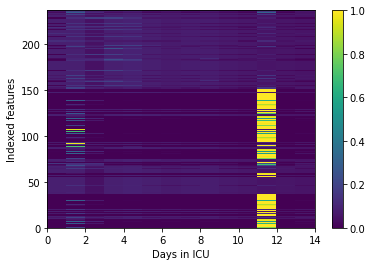

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot attention for single patient (index of 'attention_outputs')
plot_df = pd.DataFrame(attention_outputs[0]).transpose()

heatmap = plt.pcolor(plot_df)
plt.colorbar(heatmap)
plt.xlabel('Days in ICU')
plt.ylabel('Indexed features')
plt.savefig('Heatmap-LSTM-Death.svg', foramt = 'svg', dpi =1000)

## UMAP Visualization from Multitask Learner

In [ ]:
!pip uninstall umap
!pip install umap-learn

     |████████████████████████████████| 88 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 49.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=36696dc0bd34d97ffc02fd6145887a8bfce3a79008f2365d0768e9168b445cc0
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=97a98abf2710ed3cc033f9a5f9b8e99f1c298ea1fd2ca080c39a1a0d84c66ace
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
from keras.models import Model, load_model
from src.multitask import get_mimic_multitask_matrices

# Global params from LSTM training script
targets = ['MI','Sepsis','DEATH']
drop_cols = ['HADM_ID', 'SUBJECT_ID', 'HADMID_DAY', 'DOB', 'ADMITTIME','DEATHTIME'] +\
            ['hr_sepsis', 'respiratory rate_sepsis', 'wbc_sepsis', 'temperature f_sepsis', 'sepsis_points'] + \
            ['troponin', 'troponin_std', 'troponin_min', 'troponin_max']
time_steps = 14

# Fetch test data
test_df = pd.read_csv('data/test_padded.csv')
test_df.drop(columns=drop_cols, inplace=True)
test_df = test_df.fillna(0)
x_test, y_test = get_mimic_multitask_matrices(test_df, targets, time_steps)
y_dict = {target.lower(): y_test[:, :, [i]] for i, target in enumerate(targets)}

# Fetch model
model = load_model('models/multitask_' + '_'.join([target.lower() for target in targets]))

Shape of X matrix: (16378, 14, 226)
Shape of Y matrix: (16378, 14, 3)


In [ ]:
# Focus on one target outcome
umap_target = 'Sepsis'

# Re-engineer model pieces
latent_space_model = Model(inputs=model.input, outputs=model.get_layer(umap_target.lower()+'_dense').output)
latent_space_embeddings = latent_space_model.predict(x_test)
print(latent_space_embeddings.shape)

# UMAP only works with 2 dimensions; we need to choose a specific ICU day
embedding_day = 3
umap_embedding = latent_space_embeddings[:,embedding_day,:]
umap_target_y = y_test[:,embedding_day,targets.index(umap_target)]
print("UMAP outcome Y shape:", umap_target_y.shape)
print("UMAP embedding vector shape:", umap_embedding.shape)

(16378, 14, 128)
UMAP outcome Y shape: (16378,)
UMAP embedding vector shape: (16378, 128)


In [ ]:
import umap.umap_ as umap

reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(umap_embedding)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 105 kB/s 


In [ ]:
import pandas as pd
import plotly.express as px

embedding_df = pd.DataFrame({
    'D1': embedding_umap[:, 0],
    'D2': embedding_umap[:, 1],
    'Label': umap_target_y.astype('str')
})

fig = px.scatter(embedding_df, x="D1", y="D2", color='Label', width=1000, height=750)
fig.write_image("UMAP-Multitask-Sepsis.png")
fig.show()
#px.savefig('UMAP-Multitask-Sepsis.svg', foramt = 'svg', dpi =1000)

In [ ]:
# Focus on one target outcome
umap_target = 'MI'

# Re-engineer model pieces
latent_space_model = Model(inputs=model.input, outputs=model.get_layer(umap_target.lower()+'_dense').output)
latent_space_embeddings = latent_space_model.predict(x_test)
print(latent_space_embeddings.shape)

# UMAP only works with 2 dimensions; we need to choose a specific ICU day
embedding_day = 3
umap_embedding = latent_space_embeddings[:,embedding_day,:]
umap_target_y = y_test[:,embedding_day,targets.index(umap_target)]
print("UMAP outcome Y shape:", umap_target_y.shape)
print("UMAP embedding vector shape:", umap_embedding.shape)

(16378, 14, 128)
UMAP outcome Y shape: (16378,)
UMAP embedding vector shape: (16378, 128)


In [ ]:
import umap.umap_ as umap

reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(umap_embedding)
embedding_df = pd.DataFrame({
    'D1': embedding_umap[:, 0],
    'D2': embedding_umap[:, 1],
    'Label': umap_target_y.astype('str')
})

fig = px.scatter(embedding_df, x="D1", y="D2", color='Label', width=1000, height=750)
fig.show()
fig.write_image("UMAP-Multitask-MI.png")

In [ ]:
import umap.umap_ as umap
import plotly.express as px
# Focus on one target outcome
umap_target = 'DEATH'

# Re-engineer model pieces
latent_space_model = Model(inputs=model.input, outputs=model.get_layer(umap_target.lower()+'_dense').output)
latent_space_embeddings = latent_space_model.predict(x_test)
print(latent_space_embeddings.shape)

# UMAP only works with 2 dimensions; we need to choose a specific ICU day
embedding_day = 3
umap_embedding = latent_space_embeddings[:,embedding_day,:]
umap_target_y = y_test[:,embedding_day,targets.index(umap_target)]
print("UMAP outcome Y shape:", umap_target_y.shape)
print("UMAP embedding vector shape:", umap_embedding.shape)

reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(umap_embedding)
embedding_df = pd.DataFrame({
    'D1': embedding_umap[:, 0],
    'D2': embedding_umap[:, 1],
    'Label': umap_target_y.astype('str')
})

fig = px.scatter(embedding_df, x="D1", y="D2", color='Label', width=1000, height=750)
fig.show()
fig.write_image("UMAP-Multitask-DEATH.png")

(16378, 14, 128)
UMAP outcome Y shape: (16378,)
UMAP embedding vector shape: (16378, 128)
